# IC 4.9 Intro to data visualization

# Table of Contents
##### 1. Import libraries
##### 2. Import data
##### 3. Check data shape
##### 4. Create Basic Charts
    4.1 Bar chart
    4.2 Histogram
    4.3 Scatterplot
    4.4 Line chart
        4.4.1 Create a representative sample
        4.4.2 Create the Line chart
##### 5. Export charts

## 1. Import libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 2. Import data

In [4]:
# Set 'path' referencing master file
path = r'C:\Users\ashle\Documents\07-2024 Instacart Basket Analysis'

# Import data
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merged_with_flags_checked.pkl'))

## 3. Check data shape

In [5]:
# Check shape of ords_prods_merge
ords_prods_merge.shape

(32404859, 24)

In [6]:
ords_prods_merge.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,price_label,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_purchase_price,spending_flag,median_days,order_frequency_flag
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Mid-range product,Regularly busy,Regular days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,Mid-range product,Regularly busy,Regular days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,Low-range product,Regularly busy,Regular days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,Low-range product,Regularly busy,Regular days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,Low-range product,Regularly busy,Regular days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer


## 4. Create Basic Charts

### 4.1 Bar chart

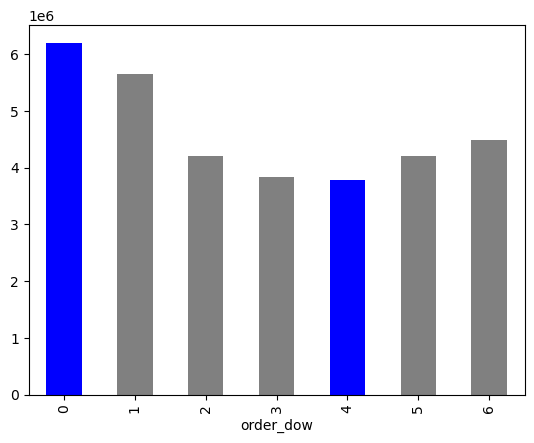

In [14]:
bar = ords_prods_merge['order_dow'].value_counts().sort_index().plot.bar(color =['blue', 'grey', 'grey', 'grey', 'blue', 'grey', 'grey'])

### 4.2 Histogram

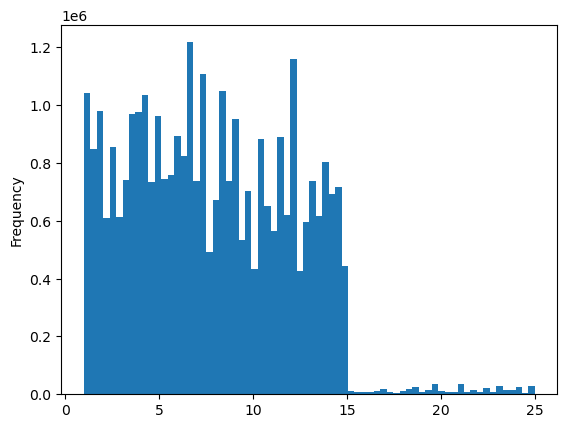

In [17]:
hist = ords_prods_merge['prices'].plot.hist(bins = 70)

### 4.3 Scatterplot

<Axes: xlabel='prices', ylabel='prices'>

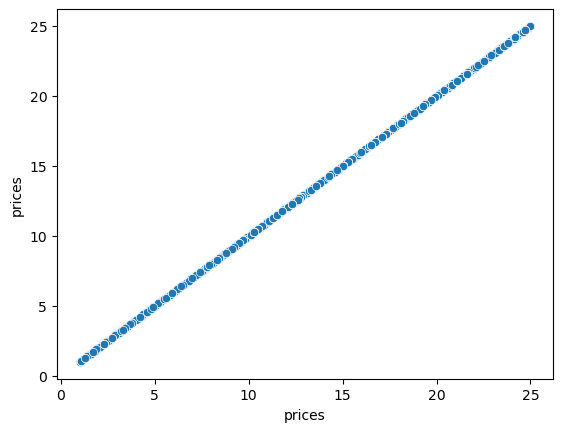

In [21]:
sns.scatterplot(x = 'prices', y = 'prices', data = ords_prods_merge)

### 4.4 Line chart

#### 4.4.1 Create a representative sample

In [40]:
np.random.seed(4)

#create a list holding True/False val;ues to the test np.random.rand() <= 0.7
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [42]:
#store 70% of the sample in the dataframe big
big = ords_prods_merge[dev]

In [44]:
#store 30% of the sample in the dataframe small
small = ords_prods_merge[~dev]

In [46]:
len(ords_prods_merge)

32433030

In [48]:
len(big) + len(small)

32433030

In [50]:
df_2 = small[['order_dow', 'prices']]

#### 4.4.2 Create the Line chart

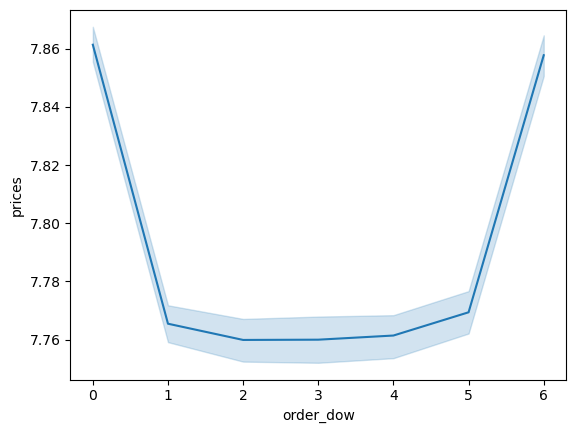

In [53]:
#create a line chart demonstrating the development of the “prices” column across the days of the week. 
line = sns.lineplot(data = df_2, x = 'order_dow', y = 'prices')

## 5. Export charts

In [30]:
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

In [34]:
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices.png'))

In [55]:
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_order_dow_prices.png'))